# 1 Modelos de color en imágenes

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

In [2]:
def show_image(image, title=None):
    """Display an image using matplotlib."""
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.show()

**1. Utilizando openCV en python, cargar una imagen RGB y mostrarla en una ventana utilizando el comando imread() y imshow(), tambien puede utilizar matplotlib para mostrarla.**

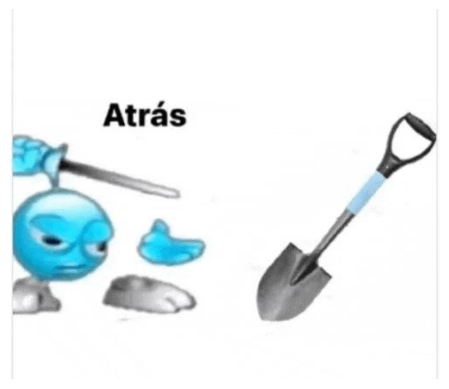

In [3]:
def ej1(matplotlib=False):

    imagen = cv2.imread('imagen color.jpg')  # Cargar la imagen
    if matplotlib:
        #imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)  # Convertimos a RGB. OpenCV utiliza por defecto BGR
        plt.imshow(imagen)  # Mostrar la imagen con matplotlib
        plt.axis('off')
        plt.show()
    else:
        cv2.imshow('Imagen Color', imagen)  # Mostrar la imagen
        cv2.waitKey(0)  # Esperar a que se presione una tecla
        cv2.destroyAllWindows()  # Cerrar la ventana

ej1(matplotlib=True)  # Llamar a la función para mostrar la imagen. El tema oscuro del IDE puede alterar la visibilidad de la imagen, para que se vea correctamente es mejor usar el tema claro

In [ ]:
ej1(matplotlib=False)  # Llamar a la función para mostrar la imagen con OpenCV

**2. Una vez cargada la imagen de muestra podemos empezar usando numpy y su funcion array para obtener el arreglo de valores de intensidad para cada uno de los canales de color.**

In [4]:
def ej2():
    imagen = cv2.imread('imagen color.jpg')

    imagen_array = np.array(imagen)  # Convertimos la imagen a un array de numpy.
    #imagen_array va a contener una tupla de la siguiente forma : (altura_img, ancho_img, canales_img)
    b = imagen_array[:, :, 0]  # Canal azul
    g = imagen_array[:, :, 1]  # Canal verde
    r = imagen_array[:, :, 2]  # Canal rojo
    # Mostramos los arreglos de cada canal
    print("Canal Azul:\n", b)
    print("Canal Verde:\n", g)
    print("Canal Rojo:\n", r)

ej2()  

Canal Azul:
 [[254 251 234 ... 245 254 254]
 [254 251 234 ... 245 254 254]
 [254 251 234 ... 245 254 254]
 ...
 [252 246 228 ... 244 252 254]
 [252 246 228 ... 244 252 254]
 [252 246 228 ... 244 252 254]]
Canal Verde:
 [[254 251 234 ... 245 252 252]
 [254 251 234 ... 245 252 252]
 [254 251 234 ... 245 252 252]
 ...
 [252 246 228 ... 244 250 252]
 [252 246 228 ... 244 250 252]
 [252 246 228 ... 244 250 252]]
Canal Rojo:
 [[254 251 234 ... 245 251 251]
 [254 251 234 ... 245 251 251]
 [254 251 234 ... 245 251 251]
 ...
 [252 246 228 ... 244 249 251]
 [252 246 228 ... 244 249 251]
 [252 246 228 ... 244 249 251]]


**3. Retomando con el ejercicio 1, analizar la imagen cargada ¿Existe algun problema con los colores
mostrados con respecto a la imagen original?**

Cuando la imagen es leida y cargada por OpenCV la imagen se ve como deberia. En cambio, cuando cargamos la imagen con OpenCV y la mostramos con matplotlib, los colores de la imagen cambia. Esto se debe a que OpenCV carga la imagen siguiendo el orden BGR (Blue, Green, Red) y matplotlib carga la imagen siguiendo el orden RGB (Red, Green, Blue). Esto causa que en donde deberia dibujarse un pixel rojo, se dibuje un pixel azul y viceversa.

**4. Cargar la imagen pero antes de mostrarla utilizar el comando cvtColor(). ¿Que sucede ahora?**

Con la funcion cvtColor() podemos cambiar la representacion de la imagen para respetar el orden RGB. Internamente lo que hace es permutar los canales en la tupla que representa la imagen.

5. Utilizar la funcion split() para una imagen RGB y separar en canales.

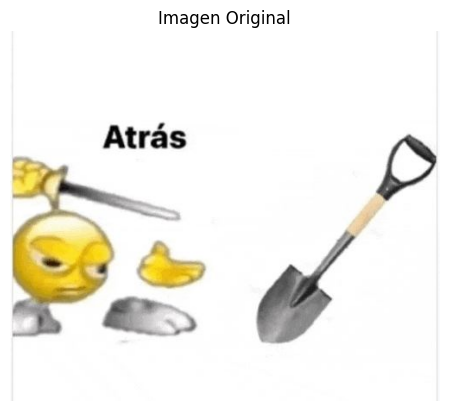

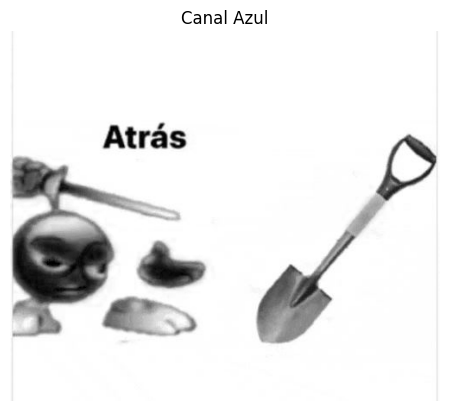

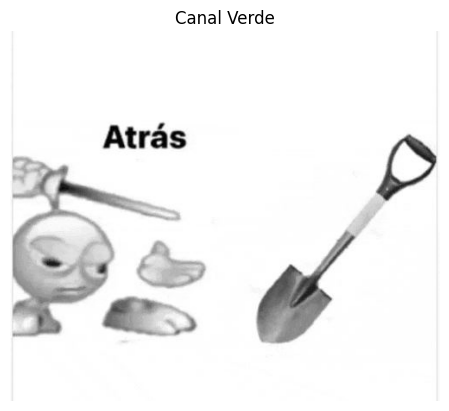

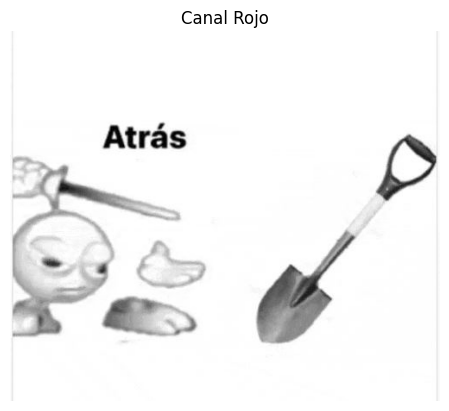

In [12]:
def ej5():
    imagen = cv2.imread('imagen color.jpg')
    b, g, r = cv2.split(imagen)  # Separar los canales de la imagen

    # Mostramos los canales por separado
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.imshow(imagen)  # Mostrar la imagen con matplotlib
    plt.axis('off')
    plt.title('Imagen Original')
    plt.show()

    show_image(b, 'Canal Azul')  # Mostrar el canal azul
    show_image(g, 'Canal Verde')  # Mostrar el canal verde
    show_image(r, 'Canal Rojo')  # Mostrar el canal rojo
   

ej5()

**6. (*) La conversion de una imagen de color a escala de grises se puede hacer de varias formas. El ejercicio consiste en convertir la imagen de Lenna color a escala de grises utilizando diferentes metodos.**  
(a) Usando la libreria cv2 y el metodo cvtColor()  
(b) Usando la formula de luminancia  
(c) Usando scickit-image y el metodo rgb2gray()  

In [13]:
def ej6(metodo='a'):
    lenna_color = cv2.imread('Lenna.png')

    if metodo == 'a':
        lenna_gris = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2GRAY) # Solo queda una tupla con las dimensiones de la imagen. No hay canales
        show_image(lenna_gris, 'Imagen Lenna Gris')

    elif metodo == 'b':
        #Formula de luminancia: Y = 0.299*R + 0.587*G + 0.114*B. Esta formula se desprende de como el ojo humano percibe
        # los colores. El ojo humano es mas sensible al verde y menos al azul por ejemplo.
        b, g, r = cv2.split(lenna_color)
        lenna_gris = 0.299 * r + 0.587 * g + 0.114 * b
        lenna_gris = lenna_gris.astype(np.uint8) # el resultado de la operacion anterior deevuelve float, openCV no puede
        # trabajar con float sino valores en el rango 0-255.
        show_image( lenna_gris, 'Imagen Lenna Gris (Luminancia)')


    elif metodo == 'c':
        lenna_color_rgb = cv2.cvtColor(lenna_color, cv2.COLOR_BGR2RGB)  # Convertimos a RGB
        lenna_gris = ski.color.rgb2gray(lenna_color_rgb)  # Convertimos a escala de grises
        lenna_gris = (lenna_gris * 255).astype(np.uint8)
        show_image(lenna_gris, 'Imagen Lenna Gris (skimage)')
 

### a)

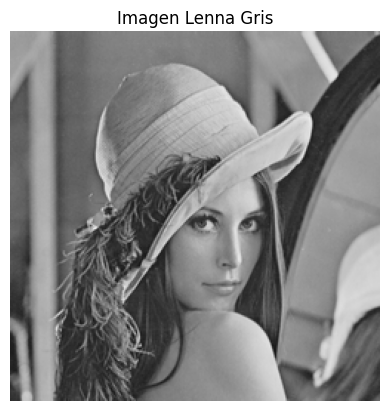

In [14]:
ej6('a')

### b)

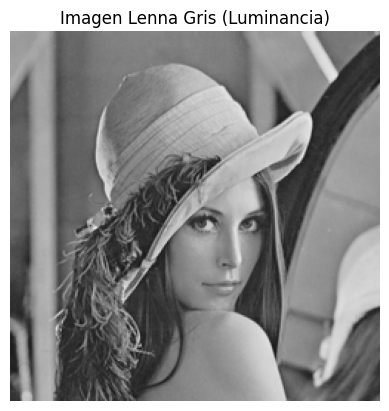

In [15]:
ej6('b')

### c)

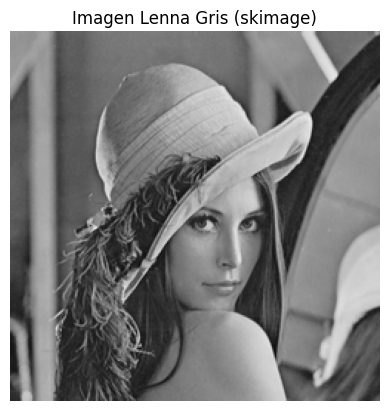

In [16]:
ej6('c')

**(d) ¿Que pasa con los canales?**  
Al transformar la imagen a una escala de grises, perdemos los distintos canales de colores de la imagen quedando un solo canal con los valores de [0-255] donde, 0 = negro, 255 = blanco [1-254] = grises. Esto es basicamente lo que hace la formula de luminancia.   
**(e) ¿Que profundidad de bits tiene la imagen?**  
La profundidad de bits se ve alterada ya que cuando teniamos la imagen a color poseiamos 3 canales con 256 valores para cada uno, dando como resultado una profundidad de 24 bits (256 x 256 x 256 = 2^8 x 2^8 x 2^8). Al reducir la imagen a un solo canal al transformarla a una escala de grises la imagen va a poseer 8 bits de profundiad (256 = 2^8).  
**(f) Evaluar con otra imagen de mayor profundidad**  
**(g) ¿Que sucede con la imagen? ¿Ha cambiado algo?**  
De manera similar a como ocurre con una imagen de profundidad de 24 bits a color, si transformamos una imagen cuya profundidad es mayor, como por ejemplo 36 (4096 x 4096 x 4096 = 2^12 x 2^12 x 2^12), a una escala de grises quedaria una imagen de una profundidad de 12 (4096 = 2^12).  

**7. (*) Convertir la imagen de Lenna a otros modos de color, como CMYK, HSV, HSL. Mostrar el resultado.**

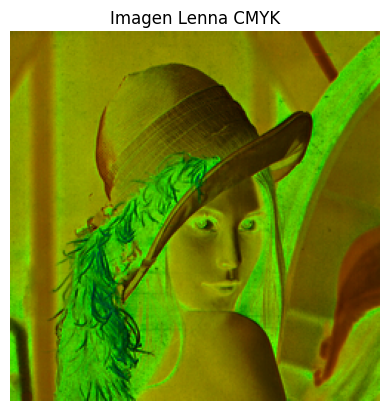

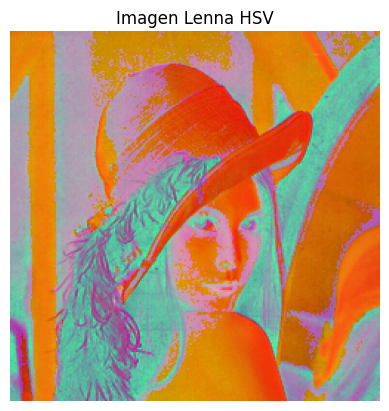

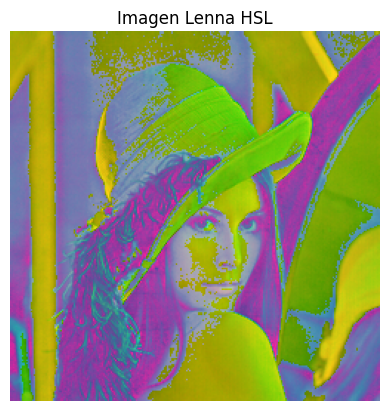

In [17]:
def ej7():
    lenna_BGR = cv2.imread('Lenna.png')
    lenna_RGB = cv2.cvtColor(lenna_BGR, cv2.COLOR_BGR2RGB)

    # Convertir a CMYK
    R, G, B = cv2.split(lenna_RGB)
    # Normalizar los valores de R, G, B a [0, 1]
    R = R.astype(np.float32) / 255.0
    G = G.astype(np.float32) / 255.0
    B = B.astype(np.float32) / 255.0

    K = 1 - np.maximum(R, np.maximum(G, B))
    # Evitar división por cero cuando K = 1
    denom = (1 - K) + 1e-8

    # Calcular C, M, Y
    C = (1 - R - K) / denom
    M = (1 - G - K) / denom
    Y = (1 - B - K) / denom

    # Convertir a rango [0, 255] para mostrar o guardar
    C = (C * 255).astype(np.uint8)
    M = (M * 255).astype(np.uint8)
    Y = (Y * 255).astype(np.uint8)
    K = (K * 255).astype(np.uint8)

    # Unir los canales
    lenna_CMYK = cv2.merge((C, M, Y, K))

    lenna_HSV = cv2.cvtColor(lenna_BGR, cv2.COLOR_BGR2HSV)
    lenna_HSL = cv2.cvtColor(lenna_BGR, cv2.COLOR_BGR2HLS)

    # Mostrar las imágenes
    show_image(lenna_CMYK, 'Imagen Lenna CMYK')
    show_image(lenna_HSV, 'Imagen Lenna HSV')
    show_image(lenna_HSL, 'Imagen Lenna HSL')
    
ej7()

**8. (*) Tomar la imagen convertida en escala de grises y volver a convertir al en modo RGB. ¿Que ha sucedido?**

La imagen se sigue viendo gris al transformarse a RGB. Lo que si cambia es el hecho de que en este caso volvemos a tener 3 canales, pero dentro de cada pixel tenemos el mismo valor en cada canal. Esto se debe a que al transformar la imagen de RGB a gris utilizamos la formula de luminancia, el cual nos da 1 solo valor por pixel. Esto provoca una perdida de informacion ya que no se puede recuperar la informacion original de los colores partiendo unicamente de la imagen en escala de grises.

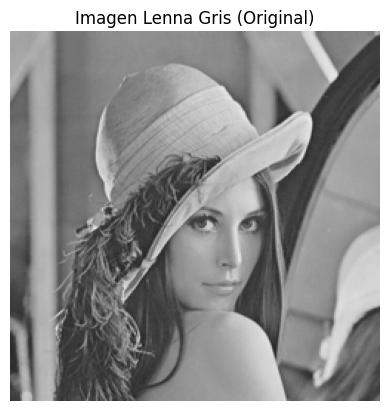

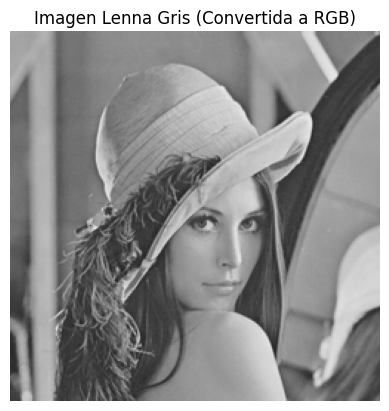

In [18]:
def ej8():
    lenna_gris = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)  # Cargar la imagen en escala de grises
    lenna_rgb = cv2.cvtColor(lenna_gris, cv2.COLOR_GRAY2RGB)  # Convertir a RGB

    # Mostrar la imagen original y la convertida
    show_image(lenna_gris, 'Imagen Lenna Gris (Original)')
    show_image(lenna_rgb, 'Imagen Lenna Gris (Convertida a RGB)')

ej8()

**9. Cargar una imagen en color con OpenCV. Extrae los valores de un pıxel en la posicion (x, y). Modifica un area de la imagen (por ejemplo, convierte una region a rojo puro). Divide la imagen en sus tres canales de color (B, G, R) y muestra cada uno por separado.**

Valores del pixel en la posicion (100, 100): B=255, G=255, R=255


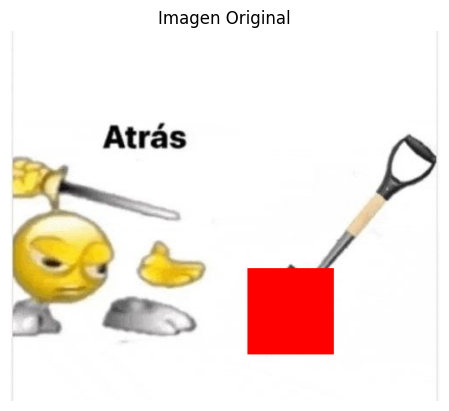

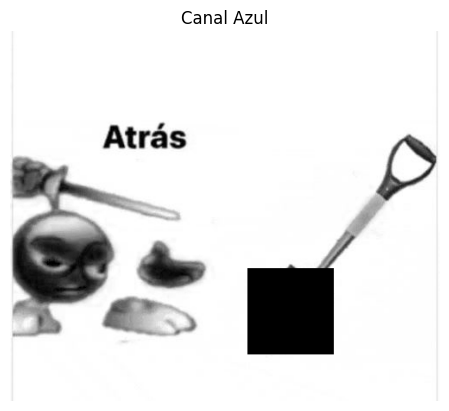

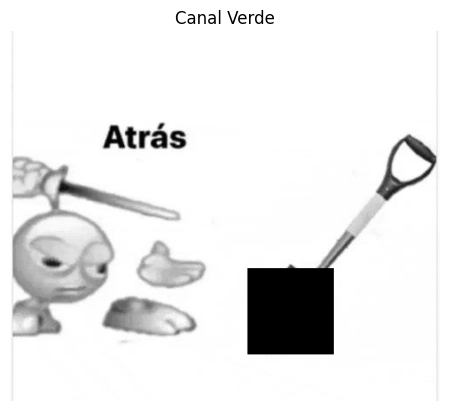

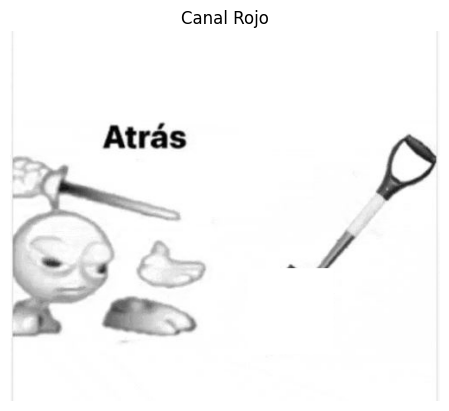

In [19]:
def ej9():
    imagen = cv2.imread('imagen color.jpg')

    # Extraer los valores de un pixel en la posicion (x, y)
    x, y = 100, 100
    pixel = imagen[y, x]
    print(f"Valores del pixel en la posicion ({x}, {y}): B={pixel[0]}, G={pixel[1]}, R={pixel[2]}")

    imagen[275:375, 275:375] = [0, 0, 255]  # Cambiar un area a rojo

    # Dividir la imagen en sus tres canales de color (B, G, R)
    b, g, r = cv2.split(imagen)

    # Mostrar cada canal por separado y la imagen original
    show_image(imagen, 'Imagen Original')
    show_image(b, 'Canal Azul')
    show_image(g, 'Canal Verde')
    show_image(r, 'Canal Rojo')


ej9()